## APS Matmulti

Alexia Pires,
Gabriela Duarte,
Stephani Ferreira

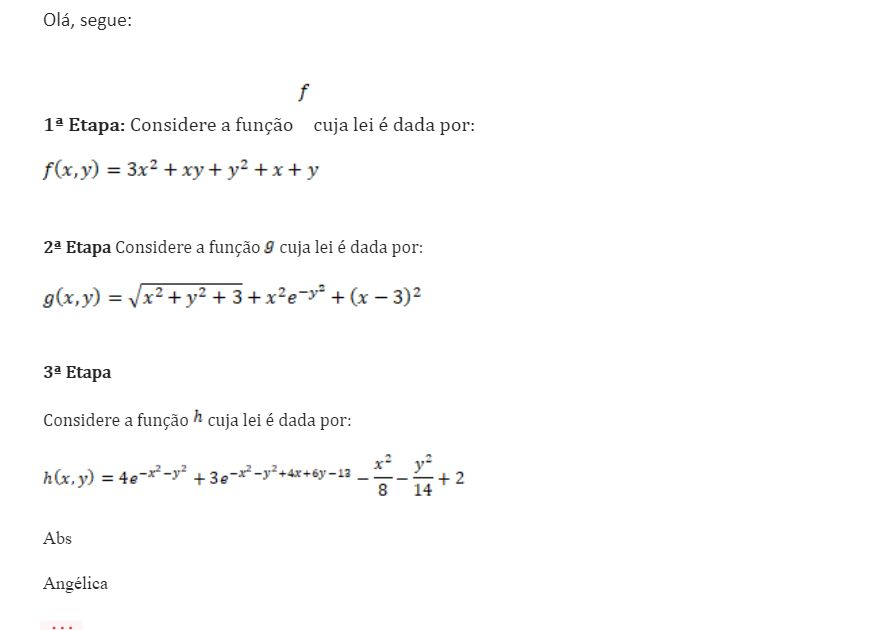

## Etapa 1)
1ª	Etapa	(35%):		
			Considere	a	função	f cuja lei f(x, y) será	atribuída	a	seu	grupo.	
        				a) Construa	o	gráfico	de	f no	GeoGebra	e	observe	que	f possui	um	único	ponto	de	mínimo	e	não	possui	
pontos	de	máximo.	
					b) Determine	o	vetor	gradiente	de	f em	um	ponto	genérico	(x, y).
					c) Usando	as	ideias	desenvolvidas	na	página	anterior,	elabore	um	código	que	permita	determinar	o	ponto	
de	mínimo	 da	 função	f.	Utilize	 um	 passo	 fixo	alpha = 0,1 e	a	estimativa	inicial	 (x0, y0) = (0,0). A	 precisão	 do	
cálculo	deverá	ser	de	10-5.
				d) Repita	o	procedimento para	os	seguintes	valores	do	passo: = 0,15,	alpha = 0,2,	alpha = 0,3 e	alpha = 0

In [5]:
#Vamos começar importando a biblioteca math para serem possíveis os cálculos das funções
import math

## LETRA A)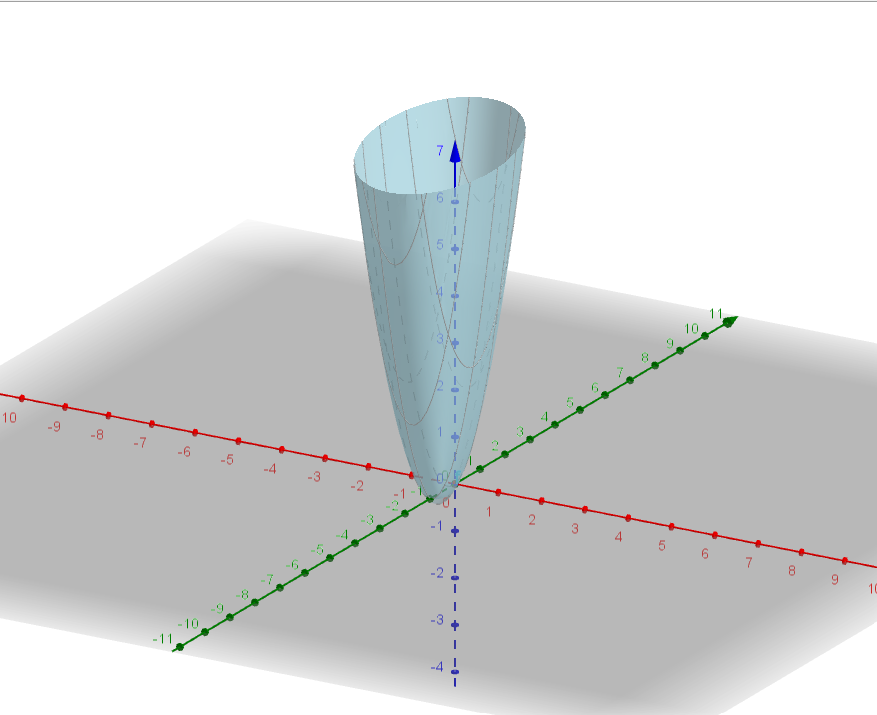

## LETRA B) e C)

Seja f(x,y) = 3x^2 + x*y + y^2 + x + y

O vetor gradiente é dado por:

Deltaf = (dfdx(x0,y0); dfdy(x0,y0))


In [33]:
# PASSO:
# Sistema:
# x1 = x0 + alpha * a  onde a é a derivada parcial de f em x (delf/delx)
# x1 = x0 + alpha *b #onde b é a derivada parcial de f em y (delf/dely)

#Primeiro, precisamos dizer ao programa qual é a nossa função em análise:
def f(x,y):
    f = 3*x**2 + x*y + y**2 + x + y
    return f

#Depois, calcula-se  o vetor gradiente, para conseguirmos entender qual é o ponto de mínimo que a etapa 1 requer:
def gradiente(x,y):
    dfdx = 6*x + y +1
    dfdy = x + 2*y + 1 
    return (dfdx, dfdy)

#Para achar novos pontos x1, y1, utilizamos o sistema dado pela orientação, no qual calculamos novos pontos em função do vetor gradiente de um passo
#Esse passo seria o "avanço" ou "regresso" do vetor:
def passo(x, y, alpha):
    a = gradiente(x,y)[0] #Avanço em x
    x = x - a*alpha
    
    b = gradiente(x,y)[1] #Avanço em y
    y = y - b*alpha
    return(x,y)

x0 = 0
y0 = 0
alpha = 0.1

x, y = passo(x0, y0, alpha)

print("Ponto Mínimo encontrado para alpha = 0.1:")
print((x, y, f(x,y))) #print devolve o ponto de mínimo da função f(x,y)

Ponto Mínimo encontrado para alpha = 0.1:
(-0.1, -0.09000000000000001, -0.1429)


## Jeitos diferentes de calcular os valores dos novos pontos:

## D) Variando valores de alpha, com novas iterações
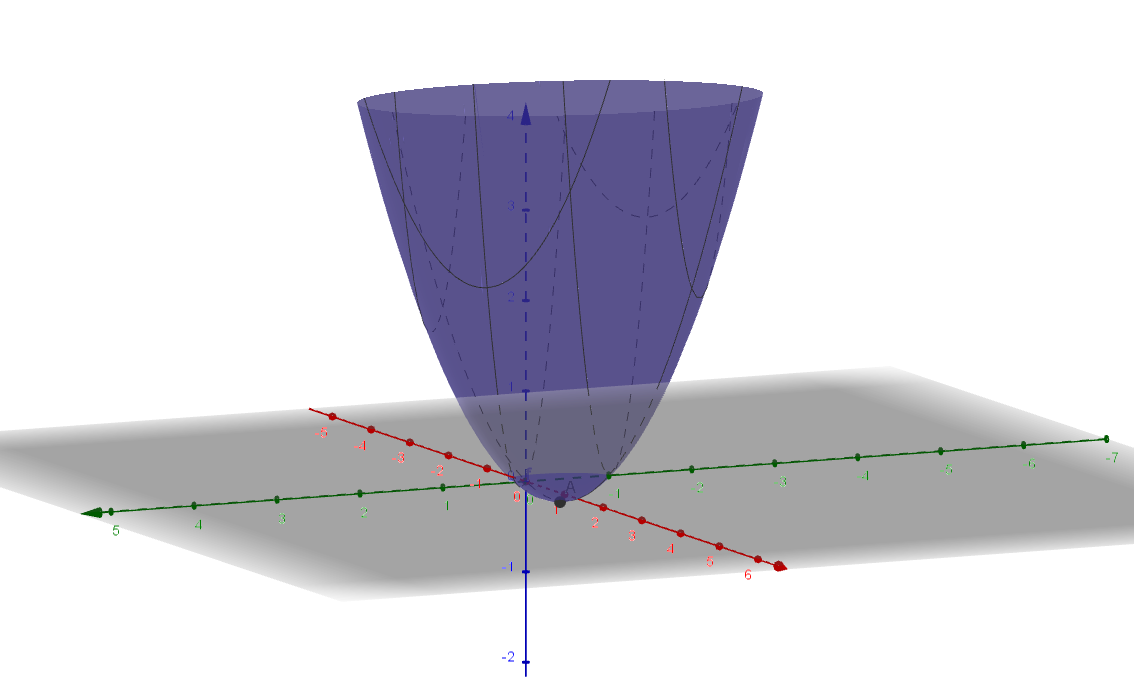

In [54]:
def f(x, y): # a função f(x,y) é usada principalmente para determinar o z dos pontos, que é determinado como f(x,y) (x, y, f(x,y))
    return 3 * x ** 2 + x * y + y ** 2 + x + y

# o ponto de mínimo é calculado com o vetor gradiente tendendo a zero, mas o programa não permite que seja zero, então é 
# necessário "cercar" o ponto usando valores muito próximos de zero. Para dar início a isso, é definida uma função que calcule 
# as derivadas parciais da função:

def gradiente(x, y):
    dfdx = 6 * x + y + 1
    dfdy = x + 2 * y + 1
    return dfdx, dfdy


# ponto inicial usado para determinar o primeiro ponto de mínimo (são adotados pontos quaisquer para ver a "convergência"):
x = 0
y = 0

alphas = [0.1, 0.15, 0.2, 0.3, 0.5] #definindo uma lista com os diferentes valores de passo que vamos testar

# o passo (primeiro comentário do último código) é definido conforme a função abaixo
def p_c(x, y, alpha):
    pc = []
    x1 = x - alpha * gradiente(x, y)[0]
    y1 = y - alpha * gradiente(x, y)[1]

    b = True
# Considerando que vai existir um "erro", dado que o valor apenas se aproxima de zero, mas não assume zero de fato, limitamos o
# erro a números bem pequenos, variando a margem de -10^-5 a +10^-5 para aumentar a precisão. É isso que o if determina
    while b:
        if -10 ** -5 <= gradiente(x1, y1)[0] <= 10 ** -5 and -10 ** -5 <= gradiente(x1, y1)[1] <= 10 ** -5:
            pc.append(x1)
            pc.append(y1)
            b = False
        else:
            x = x1
            y = y1
            x1 = x - alpha * gradiente(x, y)[0]
            y1 = y - alpha * gradiente(x, y)[1]

    return (x1,y1)

for i, alpha in enumerate(alphas): #o for repete o procedimento para cada novo passo atualizando os valores de xn e yn para cada xn+1 e yn+1 a ser calculado
    x, y = p_c(x, y, alpha)
    print(f"para o passo alpha = {alpha}, as coordenadas do ponto são({x}, {y}, {f(x,y)})")

   

para o passo alpha = 0.1, as coordenadas do ponto são(-0.09091034351188473, -0.454540148434871, -0.27272727270105734)
para o passo alpha = 0.15, as coordenadas do ponto são(-0.09091001208595784, -0.454541552377627, -0.2727272727130947)
para o passo alpha = 0.2, as coordenadas do ponto são(-0.09090968710728302, -0.45454292900938464, -0.2727272727213338)
para o passo alpha = 0.3, as coordenadas do ponto são(-0.09090937161135816, -0.45454426547156895, -0.2727272727259562)
para o passo alpha = 0.5, as coordenadas do ponto são(-0.09090912404149921, -0.4545453141943209, -0.2727272727272544)


Conclui-se que quanto menor o passo mais iterações são necessárias para um valor preciso. A próxima etapa vai deixar isso mais claro.

## Etapa 2 - Determinando os pontos de mínimo da função g(x,y):
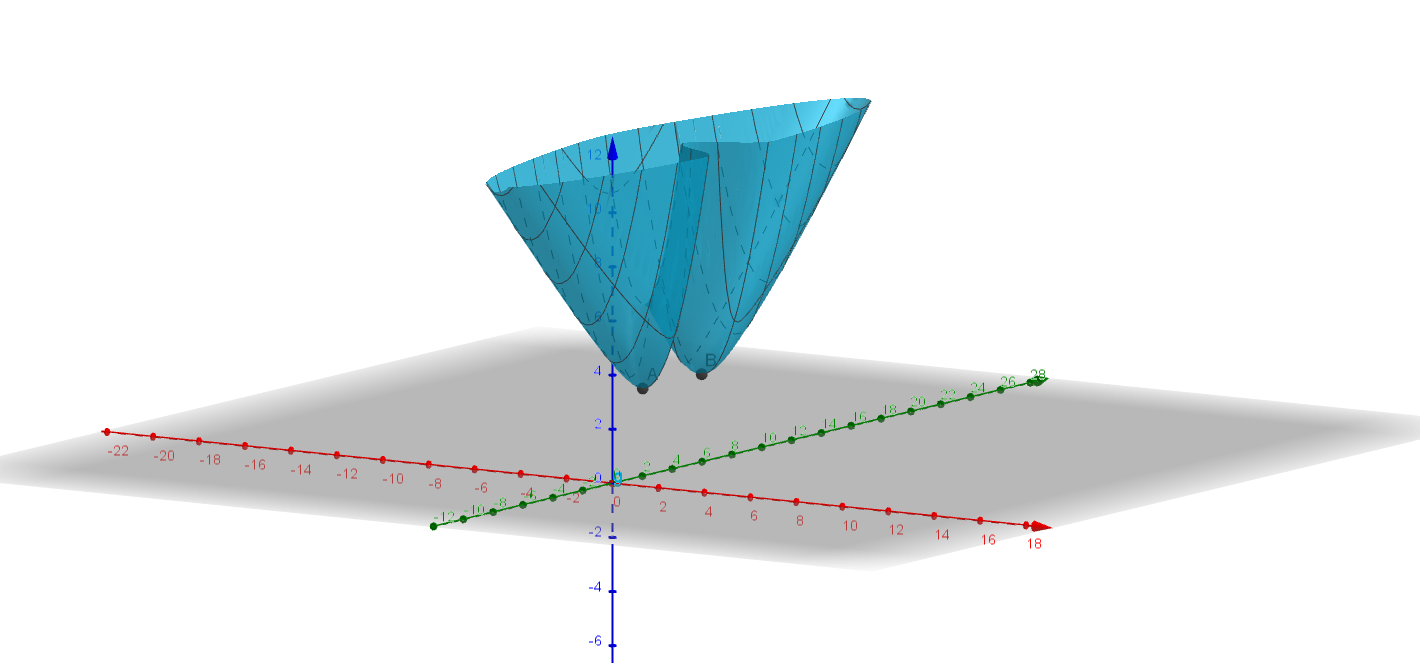

In [8]:
import math 
def g(x, y): #a função determina o g(x,y) que determina a coordenada z do ponto para cada x e y calculado.
    d = math.sqrt(x**2+y**2+3)+((x**2)*math.exp(-y**2))+((x-3)**2)
    return d #essa função será usada para deerminar o z com os valores de x e y que serão encontrados

# repetindo o método do último exercício:
# o ponto de mínimo é calculado com o vetor gradiente tendendo a zero, mas o programa não permite que seja zero, então é 
# necessário "cercar" o ponto usando valores muito próximos de zero. Para dar início a isso, é definida uma função que calcule 
# as derivadas parciais da função:

def calcula_gradiente(x, y): #definindo o gradiente da função dada para essa etapa
    dg_dx = ((x*((x**2 + y**2 + 3)**(-0.5))) + (2*x*(math.exp(-y**2))) + 2*x -6) #derivada parcial em x (gradiente em x)
    dg_dy = ((y*((x**2 + y**2 + 3)**(-0.5))) - (2*y*(x**2)*(math.exp(-y**2)))) #derivada parcial em y (gradiente em y)
    return [dg_dx, dg_dy] 



def pega_ponto(x0, y0, passo): #essa é a função que procura definir os possíveis pontos de mínimo
    x = y0
    y = x0
    # e conta o número de iterações para chegar no mínimo
    cont_iteracao = 0
    state = True
    while state == True: # o while determina que o programa calcule o resultado para um domínio, definido no primeiro if abaixo
        gradiente = calcula_gradiente(x, y) #calcula as derivadas parciais em x e y para cada passo
        if math.sqrt(gradiente[0]**2 + gradiente[1]**2) <= 1e-5: 
            state = False #para módulos do gradiente com valor <= 10^-5 a função não imprime valores, garantindo só a obtenção dos resultados mais próximos de zero
        x -= passo*gradiente[0] 
        y -= passo*gradiente[1]
        cont_iteracao += 1 #cada vez que a função roda dentro dos parâmetros, é adicionado +1 na contagem, assim é possível saber o número de iterações necessárias
    return x,y,cont_iteracao #a função devolve as coordenadas x e y do ponto mínimo e o número de iterações para obte-los, mas ainda falta a coordenada z.

# ponto inicial usado para determinar o primeiro ponto de mínimo (são adotados pontos quaisquer para ver a "convergência"):
x1 = - 3
y1 = - 3

x_1min ,y_1min, iteracoes1 = pega_ponto(x1, y1,0.1) #coordenadas de um dos ponto de mínimo para um passo de 0,1

print("O primeiro ponto mínimo com alpha = 0,1 é ({:.5f}, {:.5f}, {:.5f}) e o número de iterações é {}".format(x_1min,y_1min,g(x_1min,y_1min),iteracoes1))
print("E suas coordenadas com os outros alphas são:") # serão calculadas abaixo


# é definida uma lista com os diferentes alphas que serão utilizados como passo: 
passos = [0.15, 0.2, 0.3, 0.5]

i1 = 0
while i1 < len(passos): # o while faz com que o cálculo se repita para cada passo e para eles apenas, limitado à quantidade de alphas na lista
    x1 = - 3
    y1 = - 3
    x_1min ,y_1min, iteracoes1 = pega_ponto(x1, y1,passos[i1]) # assim o programa devolve as coordenadas do ponto de mínimo com todos os alphas na lista de passos e informa quantas iterações foram feitas para obte-las
    print(f"({x_1min:.5f}, {y_1min:.5f}, {g(x_1min,y_1min):.5f}) com o passo {passos[i1]} e {iteracoes1} iterações")
    i1 += 1
    
# ponto inicial usado para determinar o segundo ponto de mínimo da função g (novamente, pontos arbitrários):
x2 = 3
y2 = 3

x_2min ,y_2min, iteracoes2 = pega_ponto(x2, y2,0.1) # aqui são definidas as coordenadas do outro ponto de mínimo para o mesmo passo de 0,1 para testar

print("O segundo ponto mínimo com alpha = 0,1 é ({:.5f}, {:.5f}, {:.5f}) e o número de iterações é {}".format(x_1min, y_1min,g(x_2min,y_2min), iteracoes2))
print("E suas coordenadas com os outros alphas são:")
i2 = 0
while i2 < len(passos): #o mesmo processo se repete para o segundo ponto
    x2 = 3
    y2 = 3
    x_2min ,y_2min, iteracoes2 = pega_ponto(x2, y2,passos[i2])
    print(f"({x_2min:.5f}, {y_2min:.5f}, {g(x_2min,y_2min):.5f}) com o passo {passos[i2]} e {iteracoes2} iterações")
    i2 += 1


O primeiro ponto mínimo com alpha = 0,1 é (2.59649, -1.97696, 3.99276) e o número de iterações é 64
E suas coordenadas com os outros alphas são:
(2.59649, -1.97696, 3.99276) com o passo 0.15 e 45 iterações
(2.59649, -1.97695, 3.99276) com o passo 0.2 e 34 iterações
(2.59649, -1.97695, 3.99276) com o passo 0.3 e 22 iterações
(2.59649, -1.97695, 3.99276) com o passo 0.5 e 11 iterações
O segundo ponto mínimo com alpha = 0,1 é (2.59649, -1.97695, 3.99276) e o número de iterações é 77
E suas coordenadas com os outros alphas são:
(2.59649, 1.97696, 3.99276) com o passo 0.15 e 50 iterações
(2.59649, 1.97696, 3.99276) com o passo 0.2 e 36 iterações
(2.59649, 1.97695, 3.99276) com o passo 0.3 e 23 iterações
(2.59649, 1.97695, 3.99276) com o passo 0.5 e 11 iterações


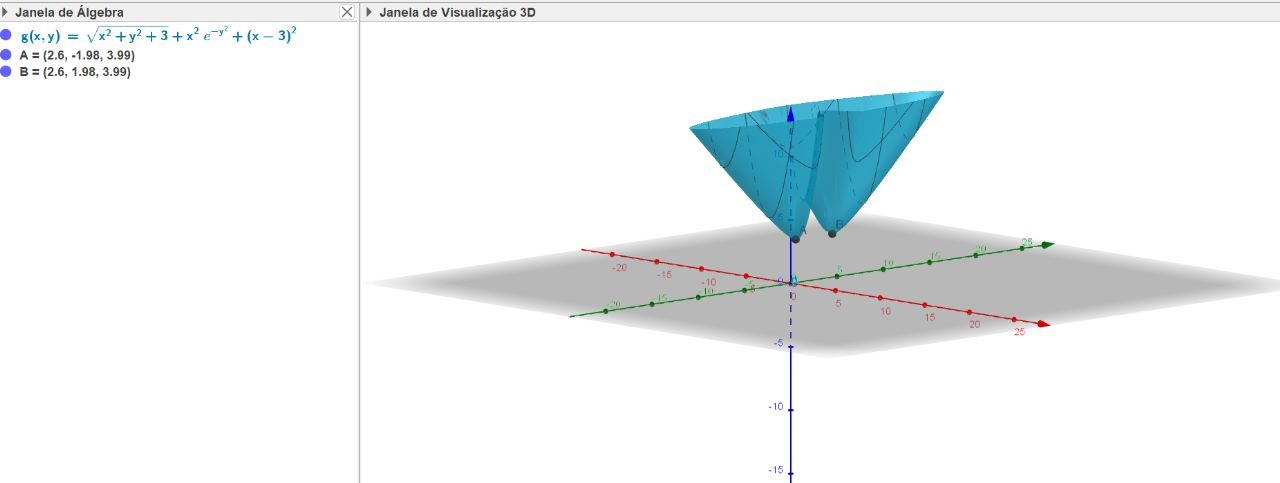

Os resultados batem com o geogebra

Aqui fica mais claro que diminuindo o passo o número de iterações para achar os pontos de mínimo é maior. Isso significa que a alteração do passo impacta no quão acentuada e precisa será a convergência para chegar no valor de mínimo. Valores menores de passo exigem uma descida mais acentuada na função definida, tornando o método mais lento na convergência. Já valores maiores, permitem uma descida menos acentuada, o que pode resultar em passos maiores e convergência mais rápida, mas também pode levar a uma menor precisão.

## Etapa 3) Curva h(x,y):
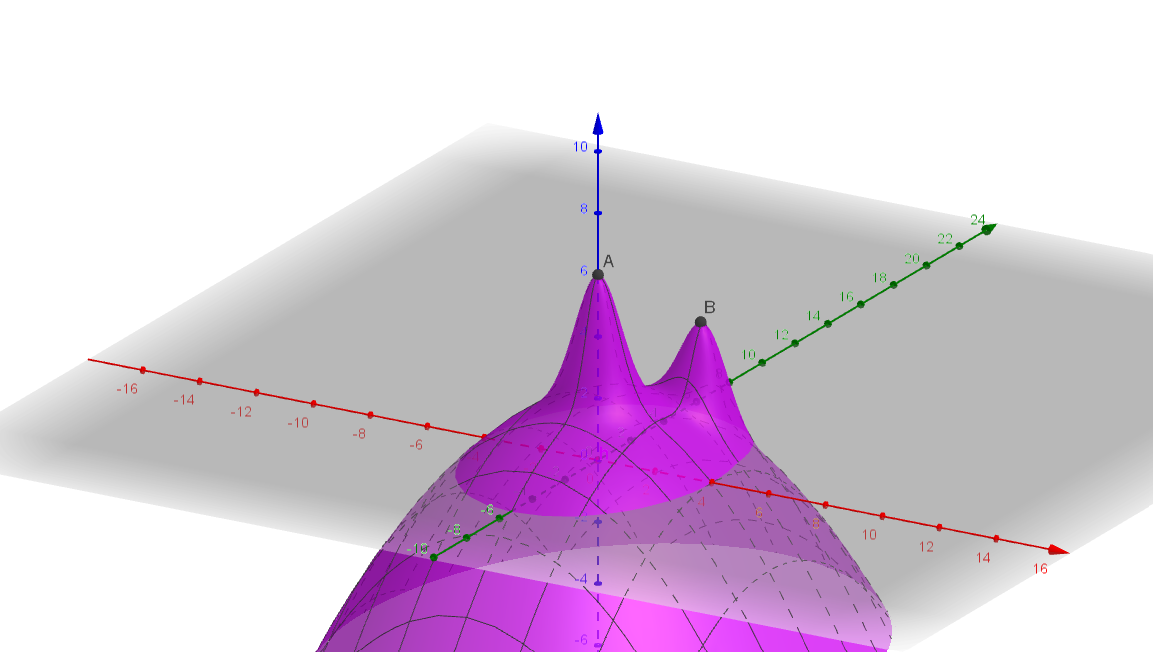

In [55]:
import math
def calcula_gradiente(x, y): #novamente é definida uma função que calcula as derivadas parciais da função dada
    dh_dx = (-6*(x-2)*(math.exp(-x**2 + 4*x - y**2 + 6*y - 13)) - (8*x)*(math.exp(-x**2 - y**2)) - ((x)/4)) # gradiente da função g em x
    dh_dy = (-6*(y-3)*(math.exp(-x**2 + 4*x - y**2 + 6*y - 13)) - (8*y)*(math.exp(-x**2 - y**2)) - ((y)/7)) # gradiente da função g em y
    return [dh_dx, dh_dy]

def pega_ponto(x0, y0, passo): #função para definir as coordenadas dos pontos de máximo 
    x = y0
    y = x0
    #conta o numero de iterações para chegar no mínimo
    cont_iteracao = 0
    state = True
    while state == True: #while determina que o programa calcule o resultado para o domínio, definido no if
        gradiente = calcula_gradiente(x, y)
        if math.sqrt(gradiente[0]**2 + gradiente[1]**2) <= 1e-5: 
            break #o código para quando o módulo do gradiente deixar de ser maior que 10^-5
        x += passo*gradiente[0]
        y += passo*gradiente[1]
        cont_iteracao += 1
    return x,y,cont_iteracao #a função devolve as coordenadas do ponto de máximo e a quantidade de iterações para obte-las

def h(x,y): #função h(x,y) para determinar o z da coordenada
    a = 4*math.exp(-x**2-y**2)+3*math.exp(-x**2-y**2+4*x+6*y-13)-((x**2)/8)-((y**2)/14)+2
    return a


In [10]:
# ponto inicial usado para determinar o primeiro ponto de mínimo:
x1 = - 3
y1 = - 3

x_1min ,y_1min, iteracoes1 = pega_ponto(x1, y1,0.1)

print("O primeiro ponto de máximo é ({:.5f},{:.5f},{:.5f}) e {} iterações".format(x_1min,y_1min,h(x_1min,y_1min),iteracoes1))
print("e suas coordenadas com outros alphas são:")

passos = [0.15, 0.2, 0.3, 0.5]
i1 = 0
while i1 < len(passos): #o while calcula para cada alpha na lista de passos e para eles apenas, limitado à extensão da lista
    x1 = - 3
    y1 = - 3
    x_1min ,y_1min, iteracoes1 = pega_ponto(x1, y1,passos[i1]) #assim são obtidas as coordenadas do ponto de mínimo para todos os alphas na lista de passos e informa quantas iterações foram necessárias para obte-las

    print("({:.5f}, {:.5f}, {:.5f}) com {} iterações, para o passo : {}".format(x_1min,y_1min,h(x_1min,y_1min),iteracoes1,passos[i1]))
    i1 += 1 
    

O primeiro ponto de máximo é (0.00000,0.00000,6.00001) e 56 iterações
e suas coordenadas com outros alphas são:
(0.00000, 0.00000, 6.00001) com 40 iterações, para o passo : 0.15
(0.00000, 0.00001, 6.00001) com 51 iterações, para o passo : 0.2


KeyboardInterrupt: 

In [57]:
# ponto inicial usado para determinar o segundo ponto de mínimo:
x2 = 3
y2 = 3

x_2min ,y_2min, iteracoes2 = pega_ponto(x2, y2,0.1)

print("O segundo ponto de máximo é ({:.5f},{:.5f},{:.5f}) e {} iterações ".format(x_2min,y_2min,h(x_2min,y_2min),iteracoes2))
print("e suas coordenadas com outros alphas são:")

i2 = 0
while i2 < len(passos): #o mesmo processo se repete para o segundo ponto
    x2 = 3
    y2 = 3
    x_2min ,y_2min, iteracoes2 = pega_ponto(x2, y2,passos[i2])
    print("({:.5f}, {:.5f}, {:.5f}) com {} iterações, para o passo : {}".format(x_2min,y_2min,h(x_2min,y_2min),iteracoes2, passos[i2]))
    i2 += 1

O segundo ponto de máximo é (1.91910,2.92942,3.89231) e 16 iterações 
e suas coordenadas com outros alphas são:
(1.91910, 2.92942, 3.89231) com 7 iterações, para o passo : 0.15
(1.91910, 2.92942, 3.89231) com 9 iterações, para o passo : 0.2
(1.91910, 2.92943, 3.89231) com 68 iterações, para o passo : 0.3


KeyboardInterrupt: 

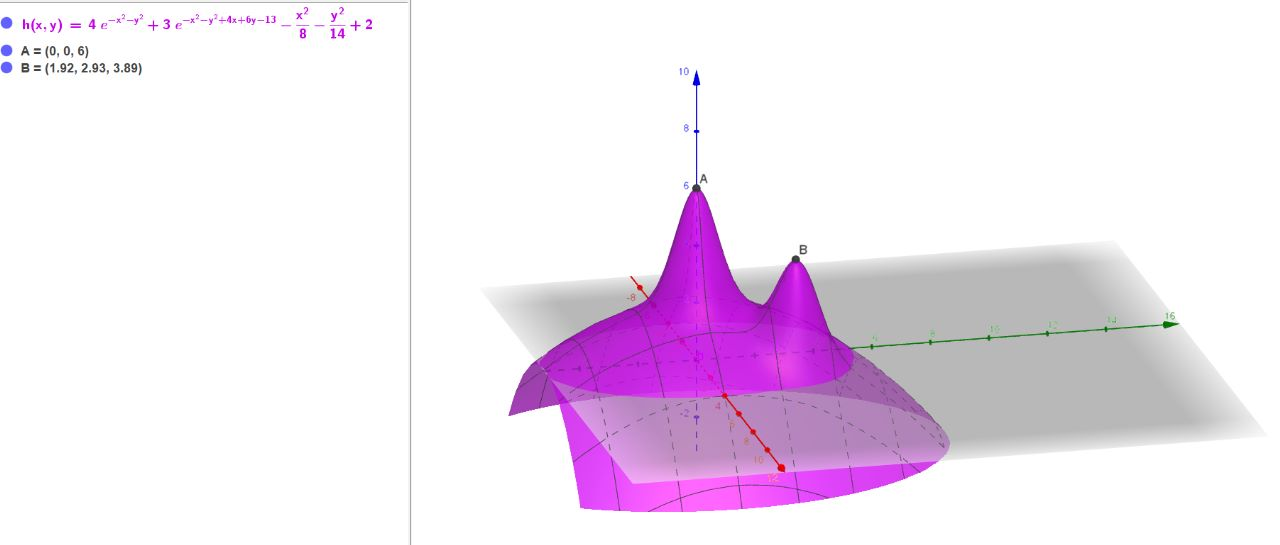

## Etapa 4 - Passo Variável:

Passo variável para problemas de otimização, como o pesquisado nessa aps, é um métodos iterativos para encontrar o mínimo ou máximo de uma função avançando em direção à solução em incrementos ou passos com tamanho ajustado dinamicamente. Isso permite um equilíbrio entre a rapidez da convergência e a precisão da solução.

Quanto mais alto o alpha no passo, mais iterações são necessárias para a convergência, então para ajustar o tamanho do passo existem várias abordagens e critérios que podem ser considerados. Alguns critérios comuns usados para determinar o tamanho do passo, segundo a pesquisa do grupo, são: regra do Armijo, critérios baseados no gradiente, backtracking line search e método de descida suave

A estratégia utilizada para determinar o tamanho do passo foi o método de backtracking line search (busca em linha com retrocesso). Neste método, o tamanho do passo é atualizado iterativamente até encontrar um valor que satisfaça determinadas condições.

O critério utilizado no backtracking line search é geralmente baseado no gradiente da função determinada. A ideia é que o tamanho do passo seja reduzido até que a função objetivo seja suficientemente reduzida, de acordo com uma condição de descida estabelecida.

Abaixo está o código comentando passo a passo para determinar o ponto mínimo da função f(x,y):

In [18]:
import numpy as np
from numpy import linalg as la

lista = []

def passo_variavel(x0, y0, max_iteracoes=1000, alpha=0.5, beta=0.8, tolerancia=1e-2):
    # Inicializa as coordenadas iniciais x e y
    x = x0
    y = y0
    for i in range(max_iteracoes):
        # Calcula os gradientes parciais df/dx e df/dy
        dfdx, dfdy = gradiente(x, y)  # (função gradiente não está implementada no código fornecido)
        
        # Armazena o gradiente em uma lista para cálculos posteriores
        grad = [dfdx, dfdy]
        
        # Define o tamanho inicial do passo
        step_size = 0.01
        
        # Realiza o backtracking line search para encontrar um tamanho de passo adequado
        while f(x - step_size * dfdx, y - step_size * dfdy) > f(x, y) - alpha * step_size * la.norm(grad)**2:
            step_size *= beta  # Reduz o tamanho do passo multiplicando pelo fator beta
        
        # Atualiza as coordenadas x e y usando o tamanho do passo adequado
        x -= step_size * dfdx
        y -= step_size * dfdy
        
        # Verifica se a norma do gradiente é menor que a tolerância
        if la.norm(grad) < tolerancia:
            break  # Se a norma do gradiente for menor que a tolerância, interrompe o loop

        lista.append(i)
            
    # Retorna as coordenadas x, y e o valor da função no ponto mínimo encontrado
    return x, y, f(x, y)

# Define as coordenadas iniciais x0 e y0
x0, y0 = 0, 0

# Chama a função passo_variavel com as coordenadas iniciais
x_min, y_min, f_min = passo_variavel(x0, y0)

# Imprime o resultado do mínimo encontrado
print("Mínimo encontrado:")
print("x =", x_min)
print("y =", y_min)
print("f(x, y) =", f_min)
print("Número de iterações:", (len(lista)))



Mínimo encontrado:
x = -0.09216849488866583
y = -0.44921040754277314
f(x, y) = -0.27270077068502696
Número de iterações: 243


A escolha dos parâmetros alpha, beta e step_size depende do comportamento da função determinada, do gradiente e das restrições do problema. É importante experimentar diferentes valores e ajustá-los de acordo com as características do problema para obter um desempenho adequado.


![etapa 4.jpg](<attachment:etapa 4.jpg>)
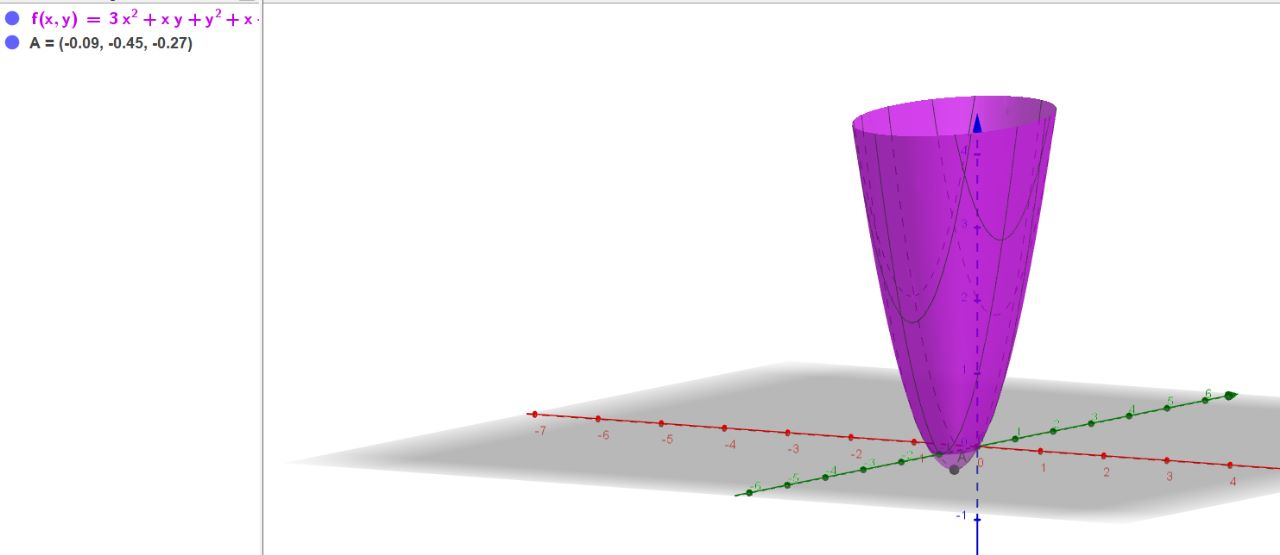

A partir desse resultado é possível verificar que bate com o gráfico do geogebra, então pode se considerar validado

Nesse caso, vale ressaltar que, comparando com o primeiro método utilizado, o número de iterações utilizando o passo variável torna-se bem maior, dando uma maior precisão para o valor de ponto mínimo encontrado.

Fontes de pesquisa utilizadas:
"Numerical Optimization" de Jorge Nocedal e Stephen J. Wright.
"Convex Optimization" de Stephen Boyd e Lieven Vandenberghe.
"Nonlinear Programming: Concepts, Algorithms, and Applications" de Dimitri P. Bertsekas.
"Optimization Methods in Finance" de Gerard Cornuejols e Reha Tütüncü.